In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import f_oneway

In [13]:
mat_contents = sio.loadmat('sub5003_CS_3_EEG_ET_combined.mat')

In [14]:
data = np.array(mat_contents['data'])

In [15]:
np.shape(data)

(40, 224, 168)

### 0:31 - EEG channels
### 32 - Gaze point (distance to target)
### 33 - Eye-movement type
### 34 - Pupil diameter
### 35 - Stimuli type
### 36 - Gaze point X
### 37 - Gaze point Y
### 38 - Image name 
### 39 - Gaze point (distance to the center of the screen)

In [106]:
non_target_idx = data[35, :, 1] == 1
target_idx = data[35, :, 1] == 2

In [107]:
np.shape(data[:, non_target_idx, :])

(39, 160, 168)

In [117]:
nt_data.shape

(160, 168)

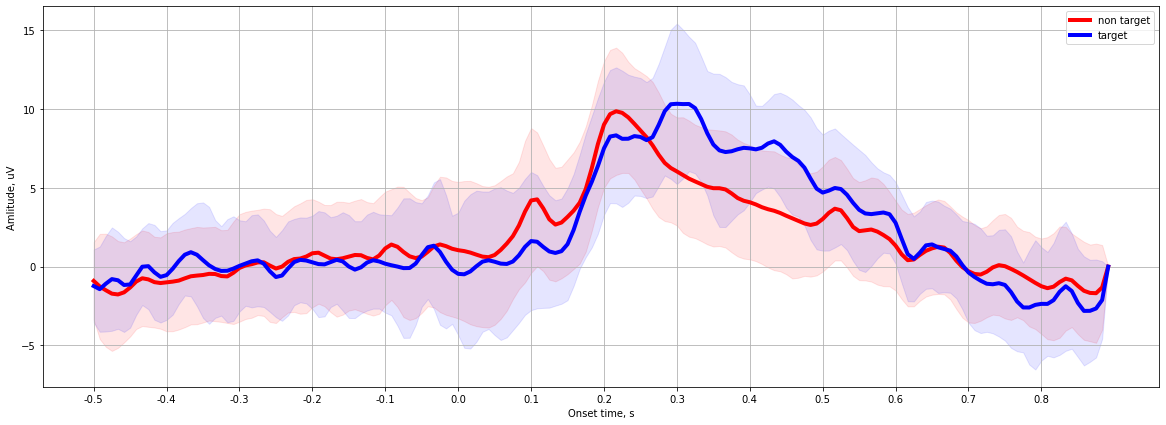

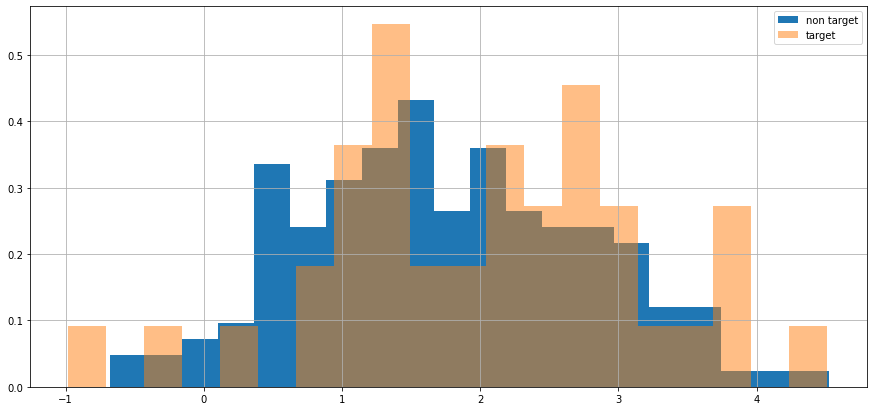

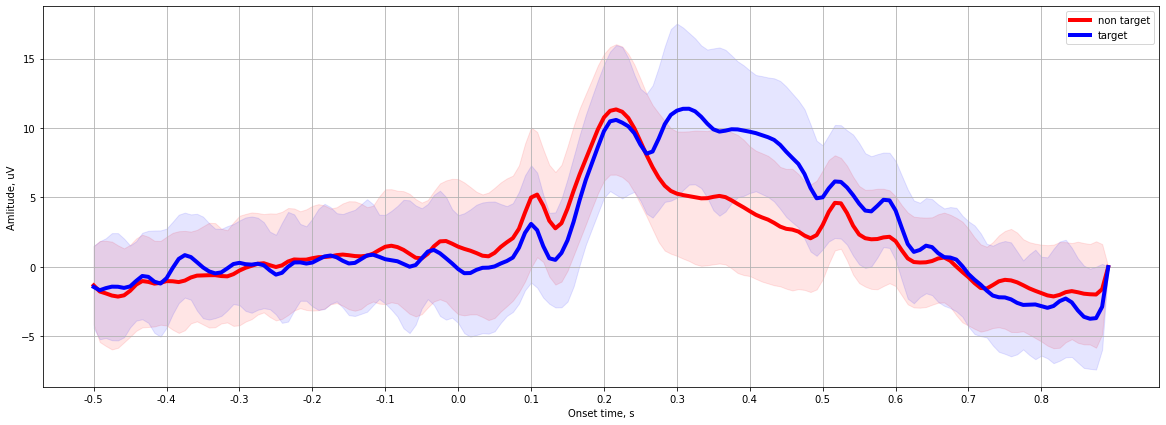

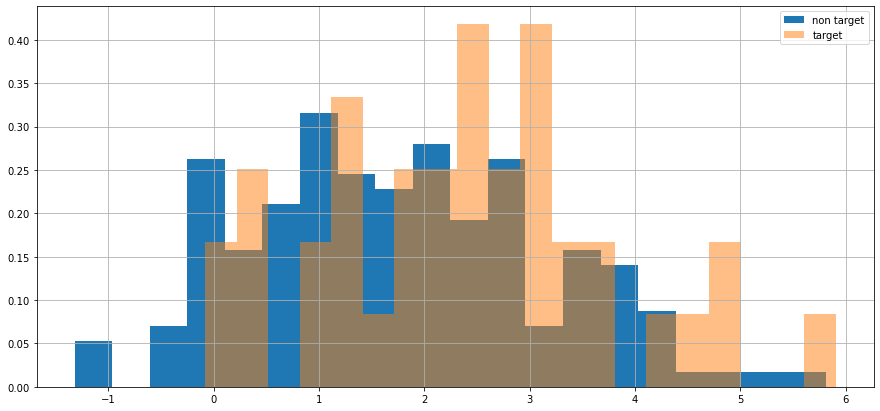

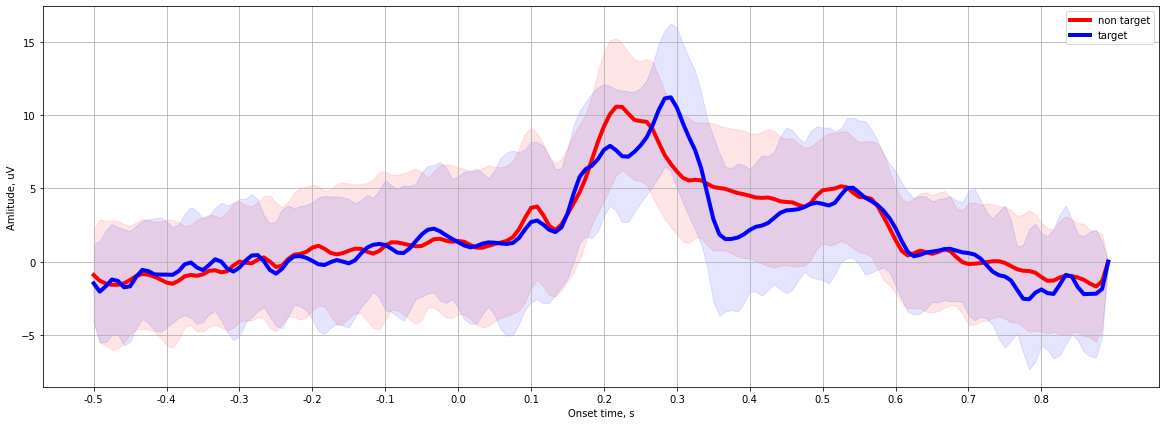

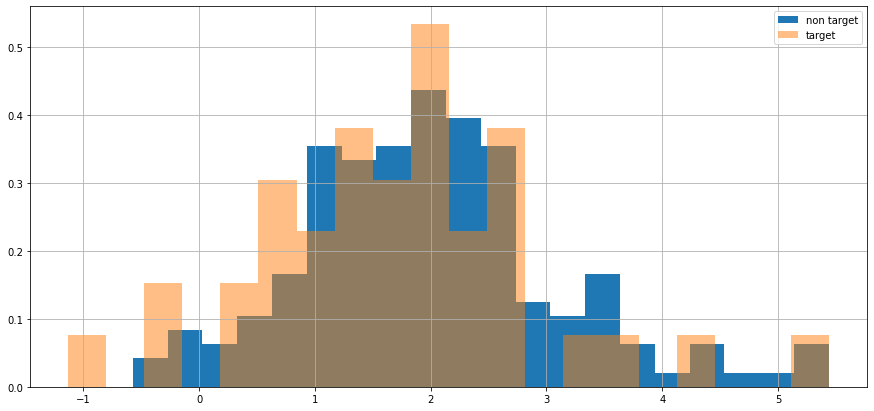

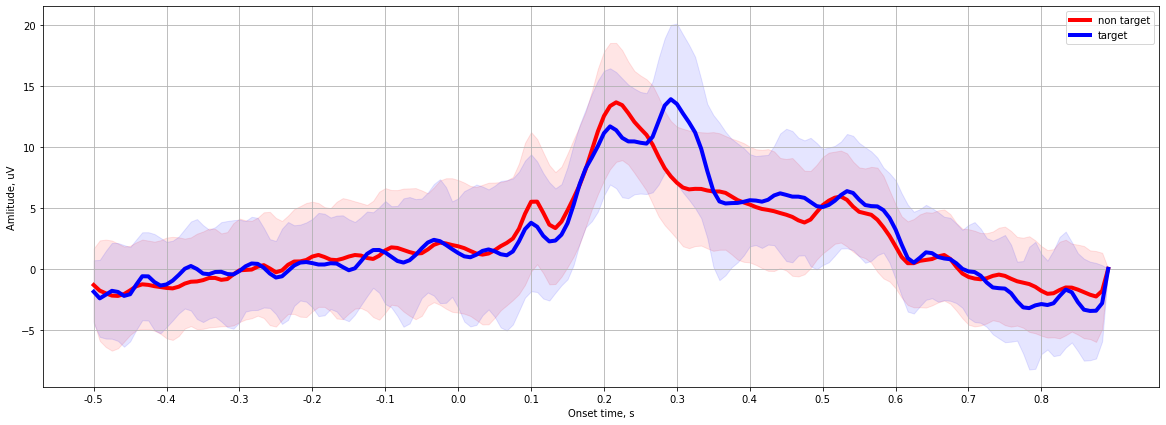

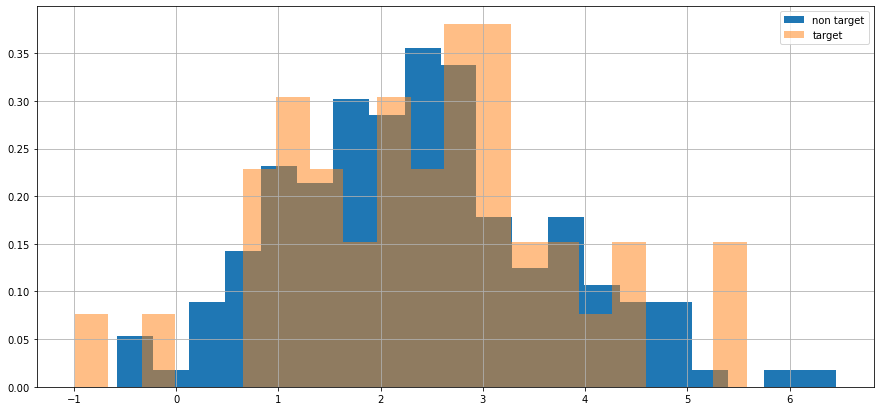

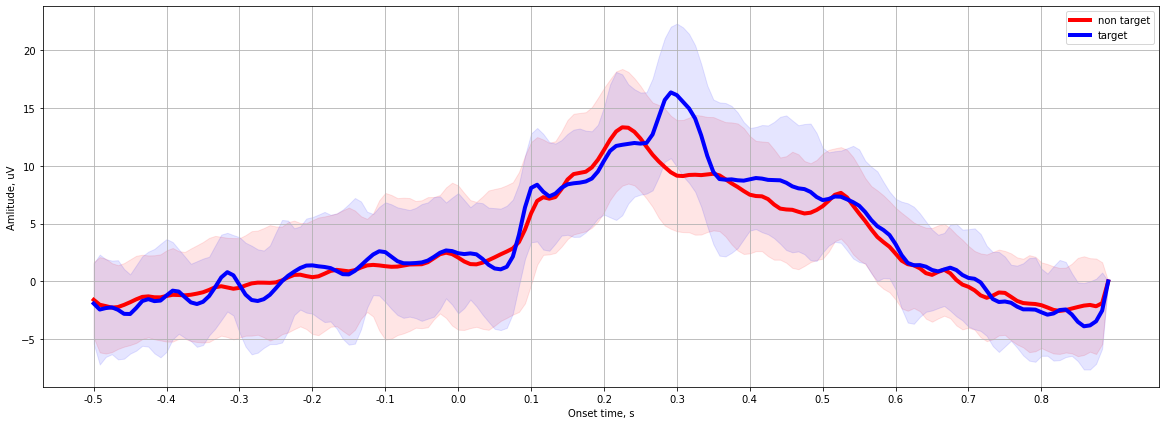

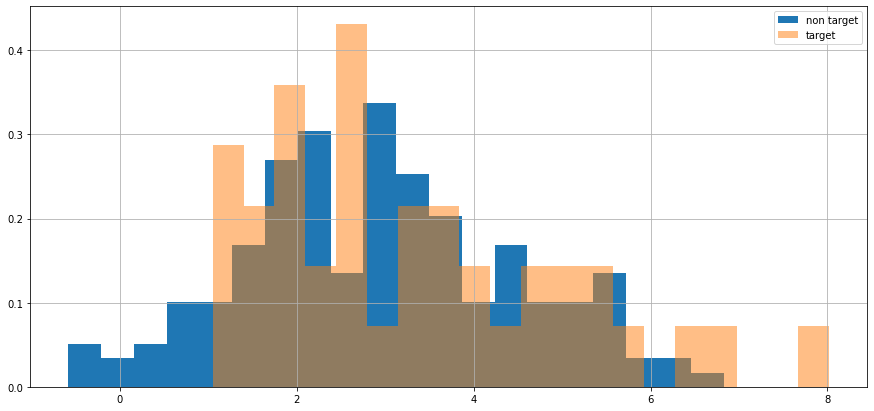

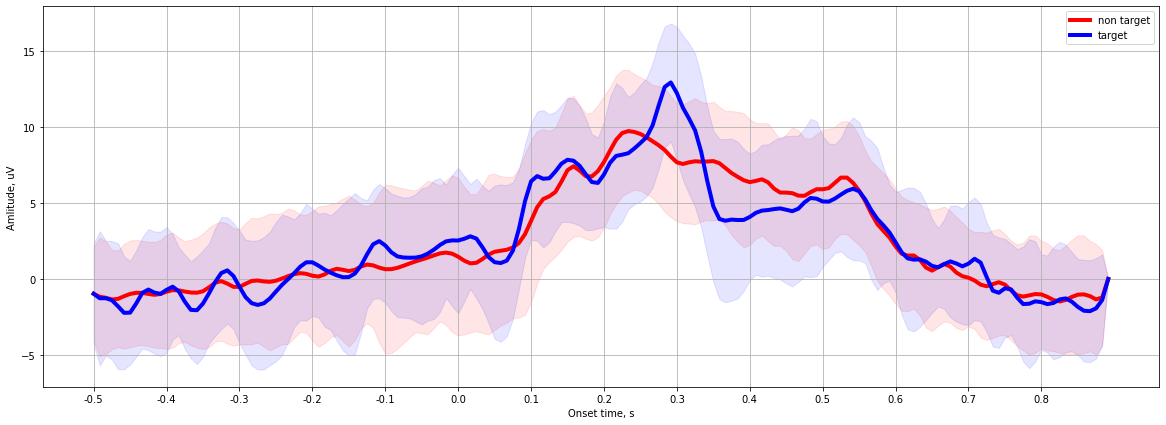

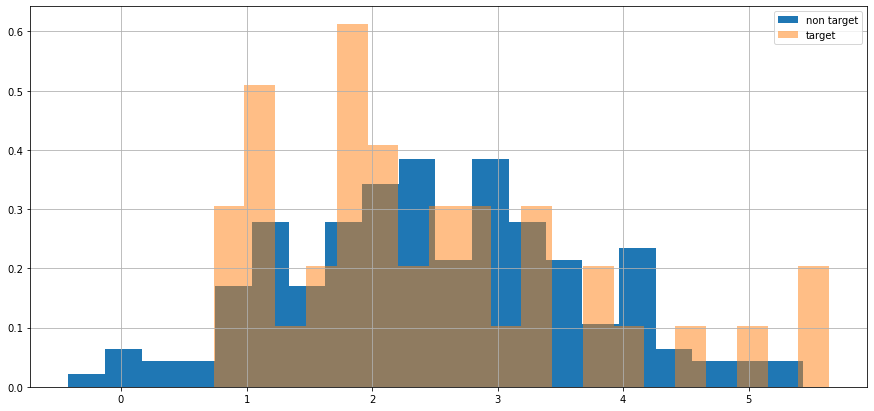

In [138]:
non_target_idx = data[35, :, 1] == 1
target_idx = data[35, :, 1] == 2

# start, end = int((0.3 + 0.5) * 120), int((0.4 + 0.5) * 120)
start, end = int((-0.5 + 0.5) * 120), int((0.9 + 0.5) * 120)
ts_idx = slice(start, end)

chs = [23, 24, 27, 28, 29, 30]
# chs = np.arange(0,32)

for ch_idx in chs:
    
    plt.figure(figsize=(20,7))
    
    # plot mean and confidence interval for non-target data
    nt_data = data[ch_idx, non_target_idx, ts_idx]
    plt.plot(np.mean(nt_data, axis=0), label='non target', linewidth=4, c='r')
    ci_non_target = np.std(nt_data, axis=0)
    plt.fill_between(np.arange(np.shape(nt_data)[1]), (np.mean(nt_data, axis=0) - ci_non_target), (np.mean(nt_data, axis=0)+ci_non_target), color='r', alpha=.1)

    # plot mean and confidence interval for target data
    t_data = data[ch_idx, target_idx, ts_idx]
    plt.plot(np.mean(t_data, axis=0), label='target', linewidth=4, c='b')
    ci_target = np.std(t_data, axis=0)
    plt.fill_between(np.arange(np.shape(nt_data)[1]), (np.mean(t_data, axis=0) - ci_target), (np.mean(t_data, axis=0)+ci_target), color='b', alpha=.1)
    
    # plot trial average for non-target data
    n_trials = np.shape(nt_data)[0]
    n_tp = np.shape(nt_data)[1]
    trial_average_nt = np.ones((n_trials, n_tp))
    tr_av_val_nt = np.mean(nt_data, axis=1)

    for trial_idx in range(n_trials):
        trial_average_nt[trial_idx, :] *= tr_av_val_nt[trial_idx]
#     plt.plot(trial_average_nt.T, linewidth=0.5, c='b', alpha=0.7)
    
    # plot trial average for target data
    n_trials = np.shape(t_data)[0]
    n_tp = np.shape(t_data)[1]
    trial_average_t = np.ones((n_trials, n_tp))
    tr_av_val_t = np.mean(t_data, axis=1)

    for trial_idx in range(n_trials):
        trial_average_t[trial_idx, :] *= tr_av_val_t[trial_idx]
        
#     plt.plot(trial_average_t.T, linewidth=0.5, c='r', alpha=0.7)

    plt.xticks(np.arange(0, np.shape(nt_data)[1], 12), np.round(1/120 * np.arange(start, end, 12) - 0.5, 2))
    plt.legend()
    plt.xlabel('Onset time, s')
    plt.ylabel('Amlitude, uV')
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.hist(tr_av_val_nt, density=True, bins=20, label = 'non target')
    plt.hist(tr_av_val_t, density=True, bins=20, alpha=0.5, label = 'target')
    plt.legend()
    plt.grid()
    plt.show()


In [78]:
from scipy import stats

In [110]:
stats.ttest_ind(t_PD, nt_PD, equal_var=True)

Ttest_indResult(statistic=7.204731244274576, pvalue=1.1912390347378346e-11)

In [111]:
stats.ttest_ind(t_PD, nt_PD, equal_var=False)

Ttest_indResult(statistic=7.022709624193127, pvalue=2.6376482611281606e-09)

In [97]:
np.mean(t_PD)

6.4850894939878545

In [98]:
np.mean(nt_PD)

6.016794456038632

In [99]:
f_oneway(t_PD, nt_PD)

F_onewayResult(statistic=0.5979016604642872, pvalue=0.44020230117272097)

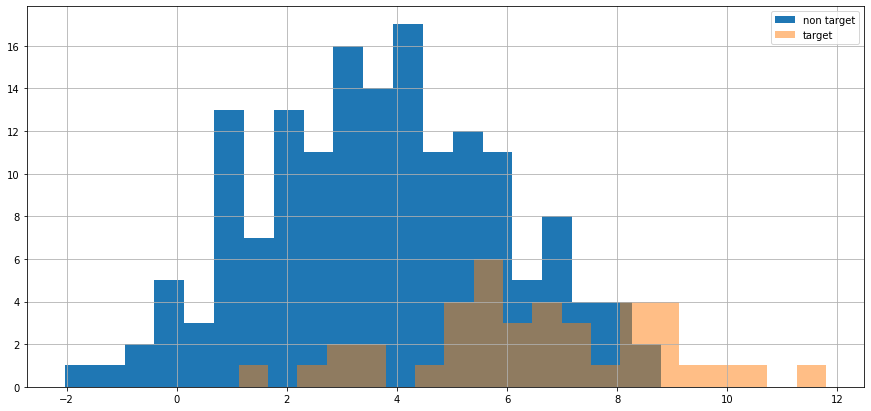

In [112]:
start, end = int((0.3 + 0.5) * 120), int((0.6 + 0.5) * 120)
# start, end = int((-0.5 + 0.5) * 120), int((0.9 + 0.5) * 120)
ts_idx = slice(start, end)

nt_PD = np.mean(data[23, non_target_idx, ts_idx], axis=1)
t_PD = np.mean(data[23, target_idx, ts_idx], axis=1)

plt.figure(figsize=(15,7))
plt.hist(nt_PD, density=False, bins=20, label = 'non target')
plt.hist(t_PD, density=False, bins=20, alpha=0.5, label = 'target')
plt.legend()
plt.grid()
plt.show()

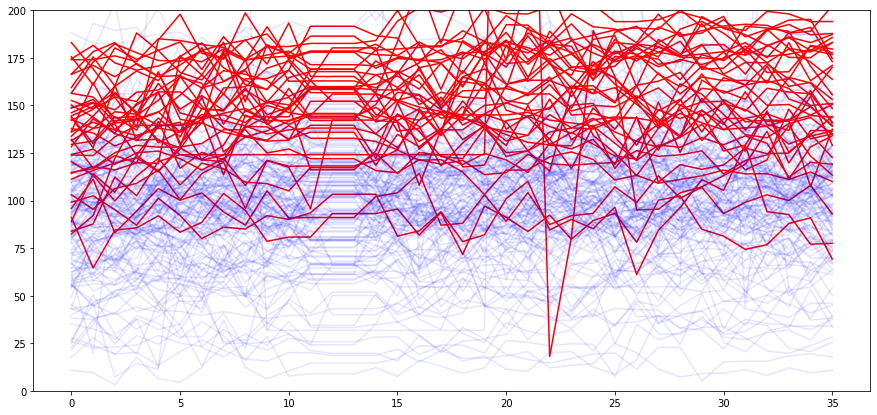

In [9]:
plt.figure(figsize=(15,7))
plt.plot(data[32, target_idx, ts_idx].T, c='r')
plt.plot(data[32, non_target_idx, ts_idx].T, c='b', alpha=0.1)
plt.ylim([0,200])
plt.show()

In [10]:
data[32, target_idx, :]

array([[ 47.67598976,  56.00892786,  26.47640459, ..., 142.04224724,
        145.96232391, 156.4161117 ],
       [ 36.79673899,  26.92582404,  29.06888371, ..., 135.2368293 ,
        126.19429464, 132.03408651],
       [ 86.83893136,  84.21995013,  78.23681998, ..., 135.00370365,
        143.08738589, 125.29964086],
       ...,
       [124.65151423, 116.21101497,  99.689518  , ..., 105.54619842,
        114.85643212, 102.3132445 ],
       [303.20455142, 134.11189358, 130.03461078, ..., 181.47176089,
        185.27007314, 183.91846019],
       [131.47243057, 140.13208055, 132.56319248, ..., 137.31715115,
        120.54044964, 135.36617007]])

In [11]:
np.shape(data[32, non_target_idx, :])

(160, 168)

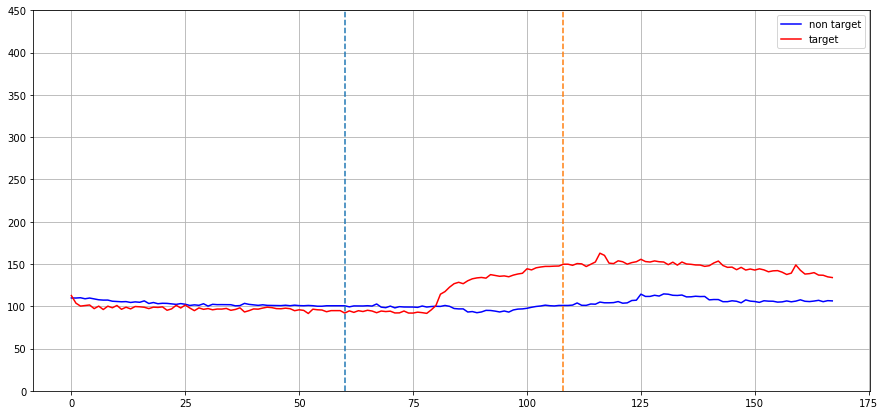

In [12]:
plt.figure(figsize=(15,7))
plt.plot(np.mean(data[32, non_target_idx, :], axis=0), c='b', label='non target')
plt.plot(np.mean(data[32, target_idx, :], axis=0), c='r', label='target')
plt.plot([(0.5)*120, (0.5)*120], [0, 450], '--')
plt.plot([(0.5+0.4)*120, (0.5+0.4)*120], [0, 450], '--')
plt.ylim([0,450])
plt.legend()
plt.grid()
plt.show()

In [13]:
len(target_idx)

200

In [14]:
grad_min = np.array([np.argmin(np.gradient(data[32, target_idx, :][i], edge_order=2)) for i in range(40)])

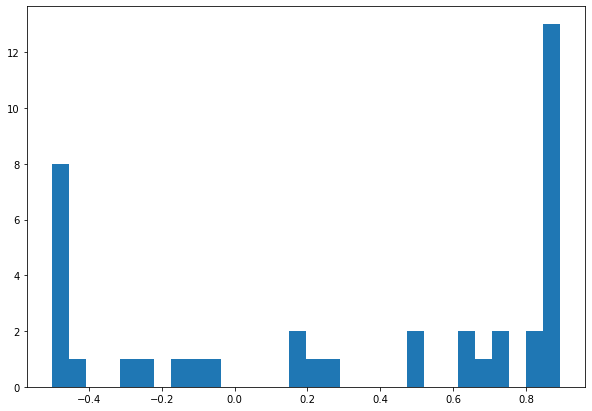

In [15]:
plt.figure(figsize=(10,7))
plt.hist(grad_min/120 - 0.5, bins=30)
plt.show()

In [16]:
sum(grad_min < 84)

16

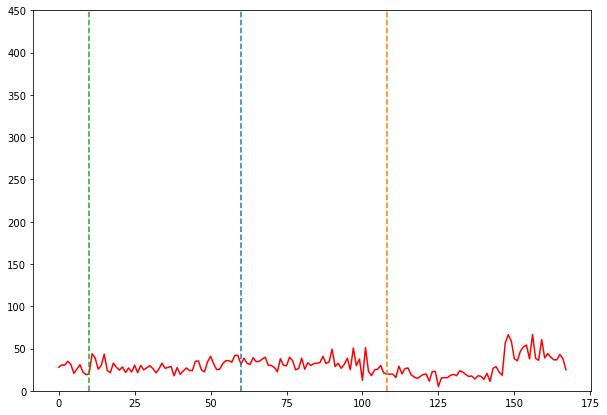

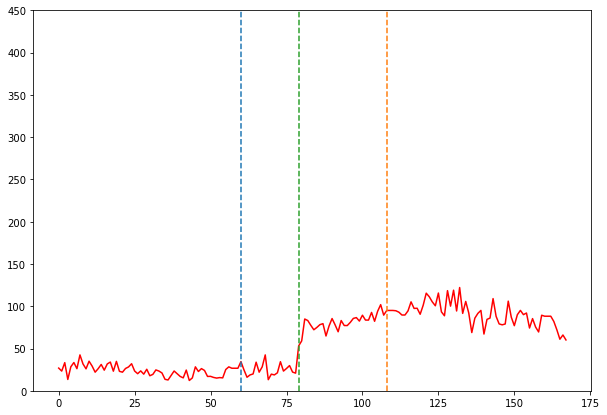

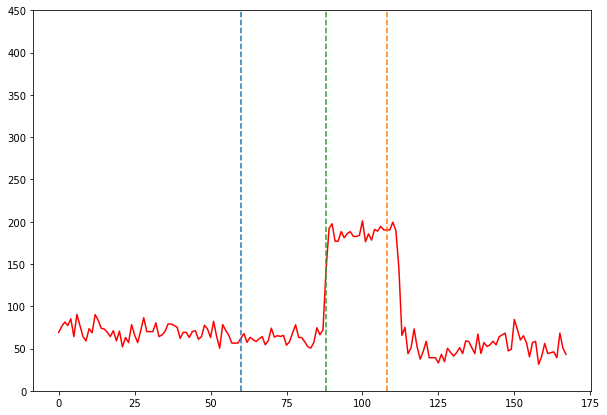

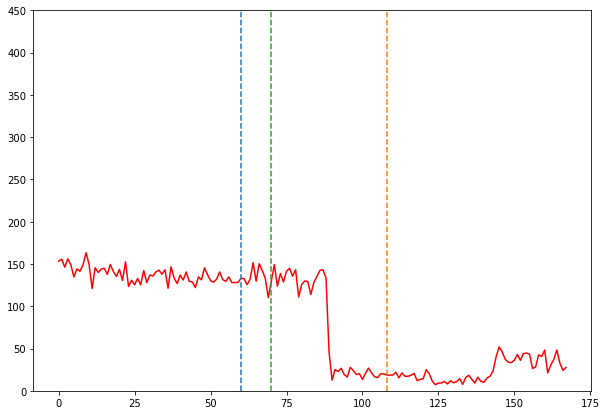

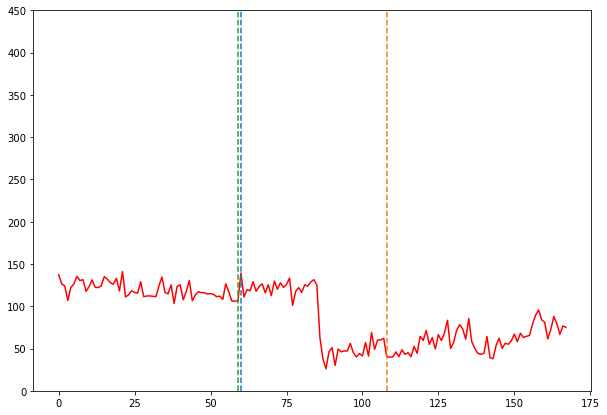

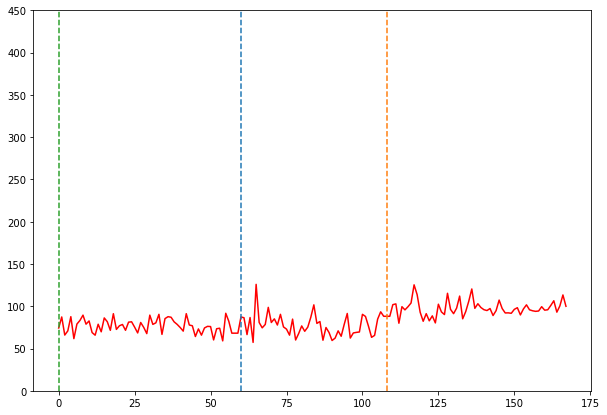

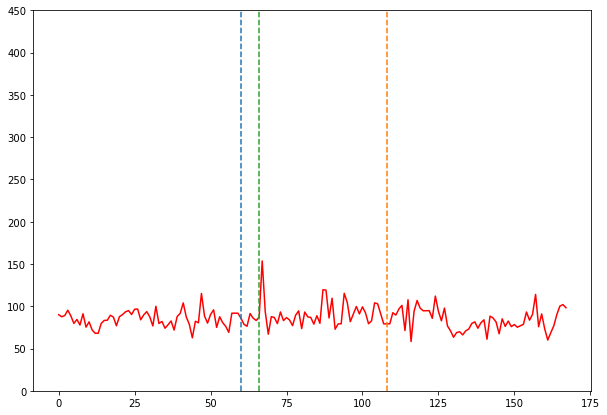

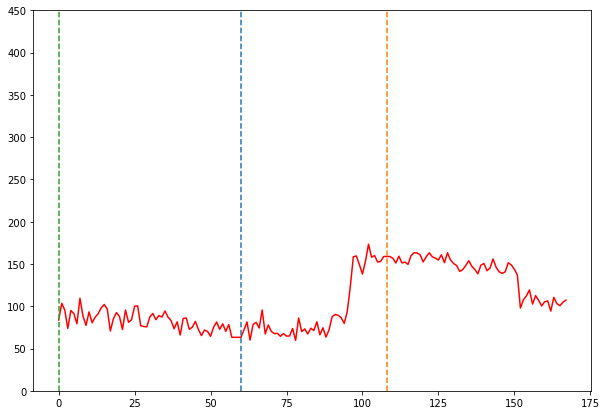

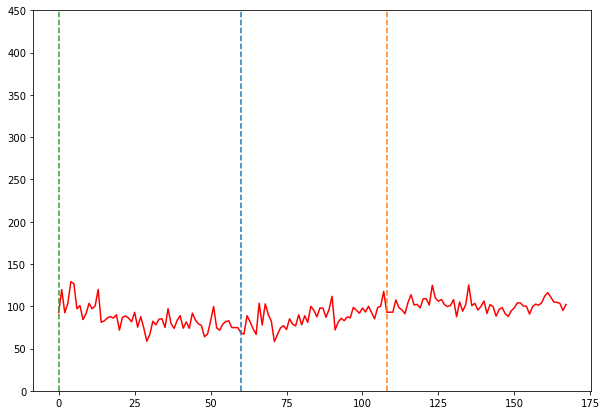

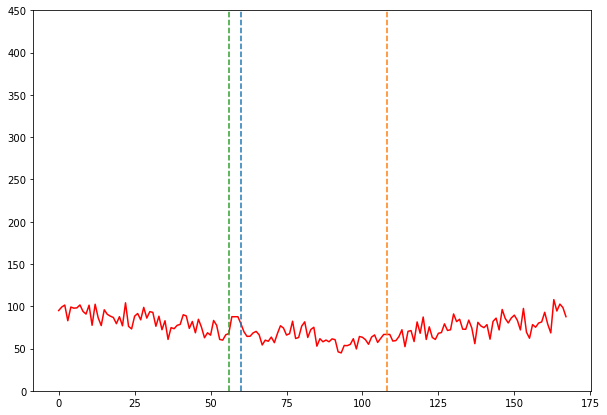

In [17]:
grad_max = np.array([np.argmax(np.gradient(data[32, non_target_idx, 0:108][i], edge_order=2)) for i in range(40)])
for i in range(10):
    plt.figure(figsize=(10,7))
    plt.plot(data[32, non_target_idx, :][i], c='r')
    plt.plot([(0.5)*120, (0.5)*120], [0, 450], '--')
    plt.plot([(0.5+0.4)*120, (0.5+0.4)*120], [0, 450], '--')
    plt.plot([grad_max[i], grad_max[i]], [0, 450], '--')
    plt.ylim([0,450])

<ipython-input-18-a09f834cc4db>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,7))


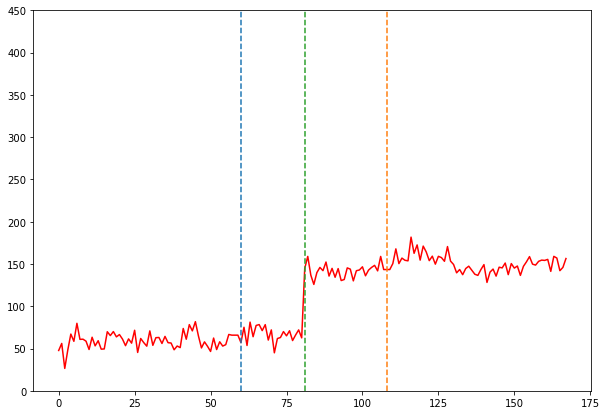

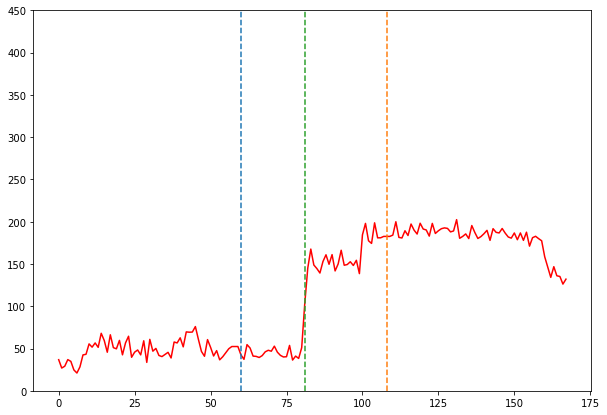

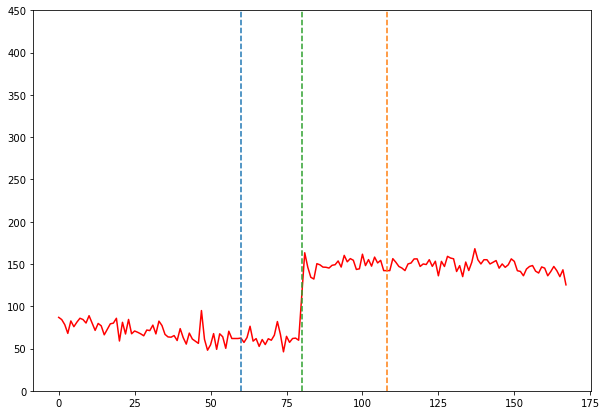

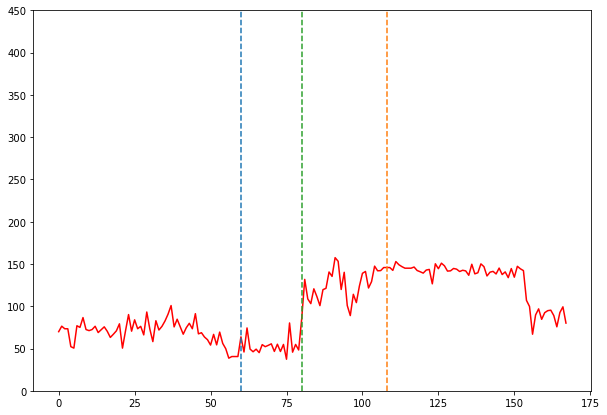

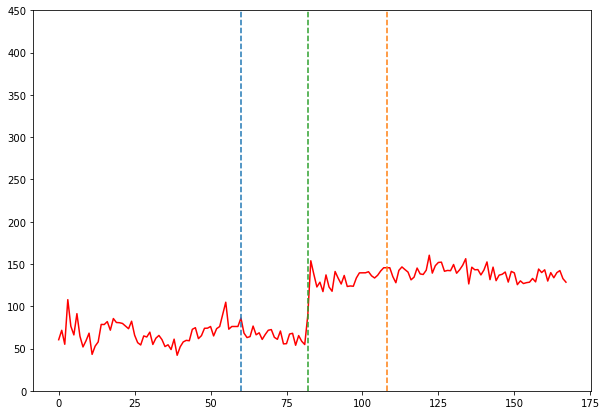

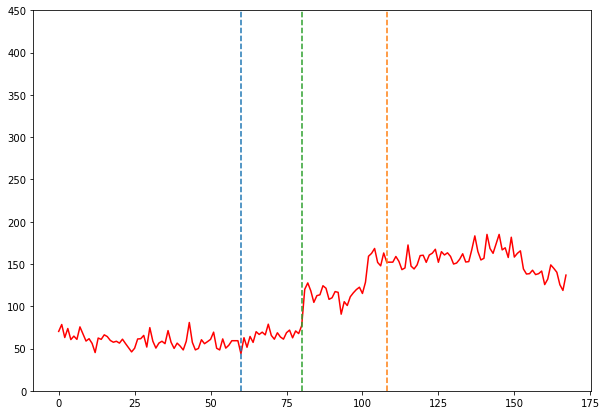

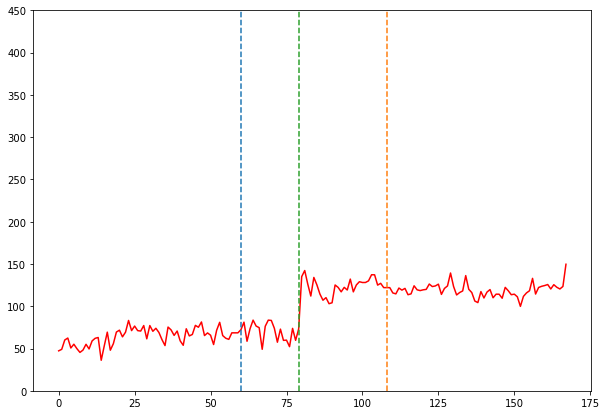

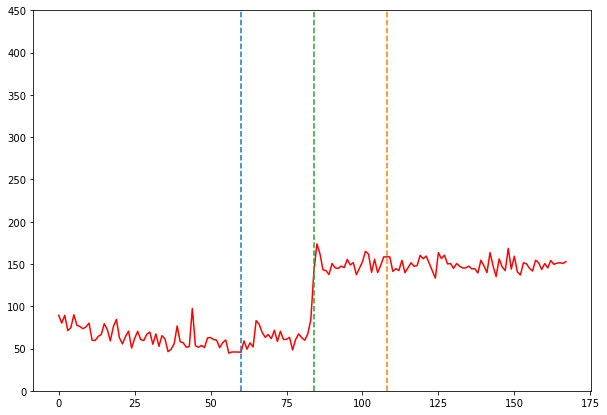

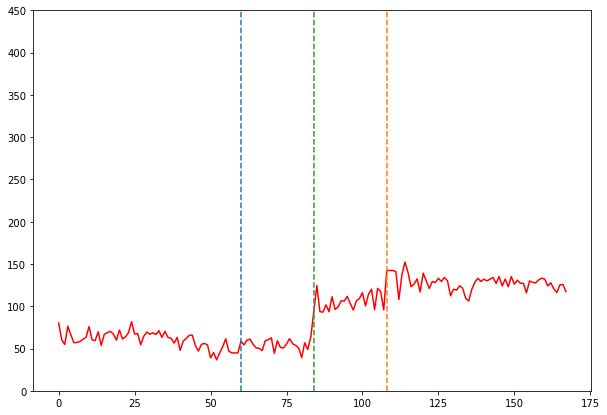

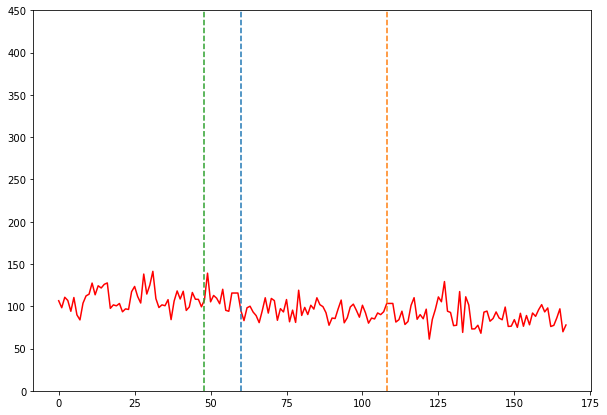

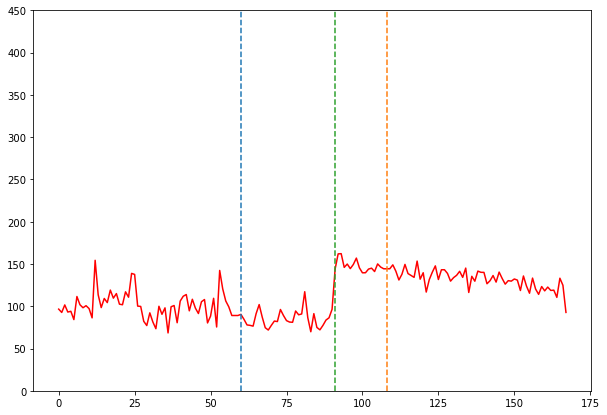

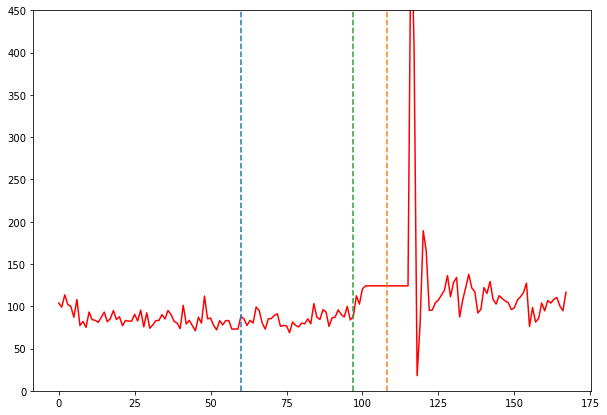

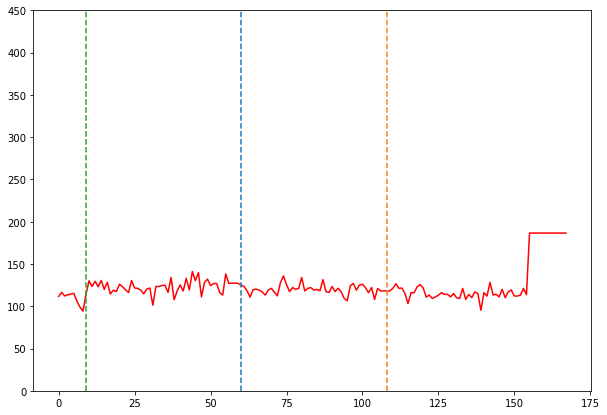

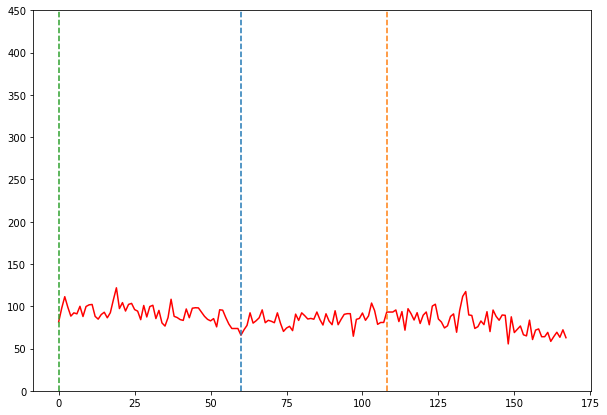

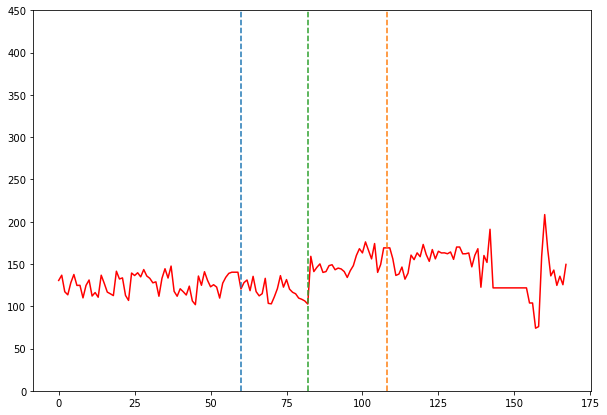

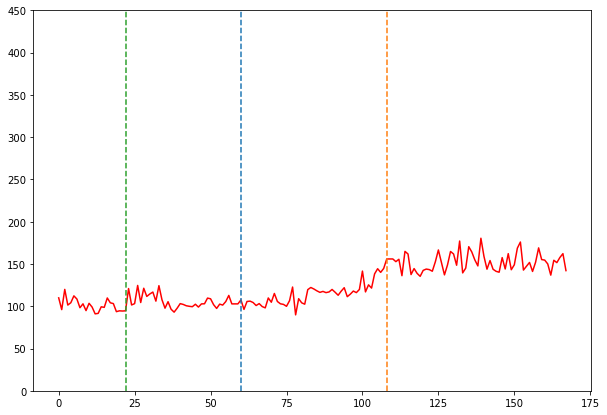

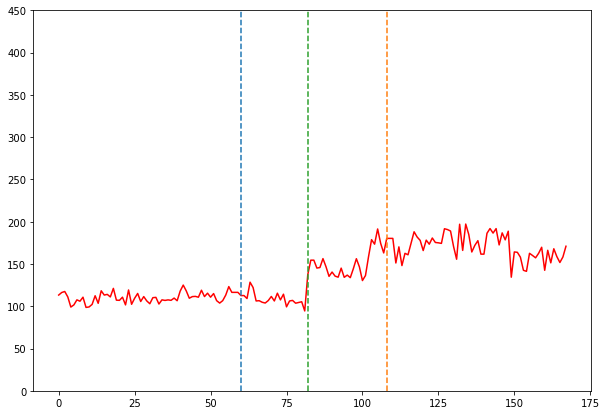

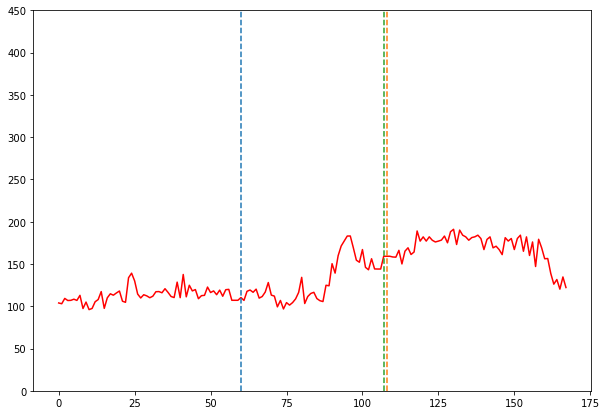

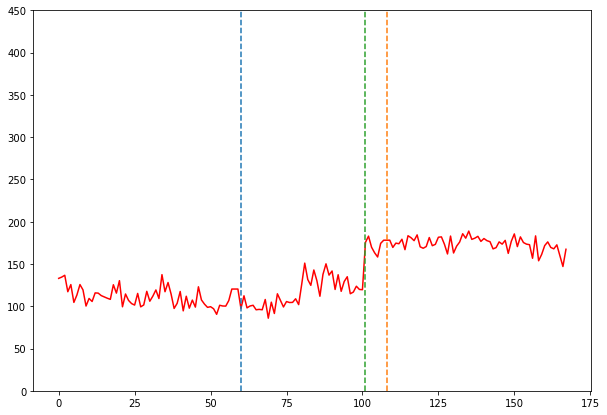

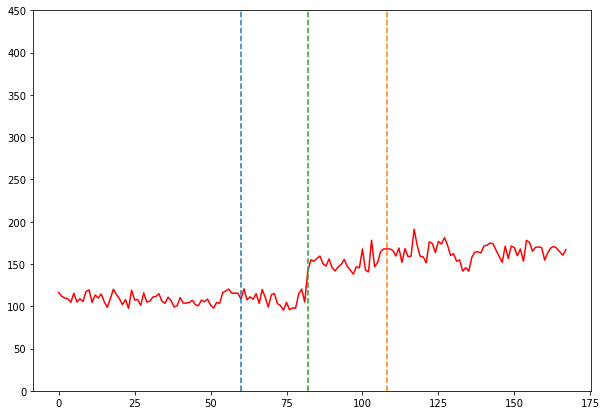

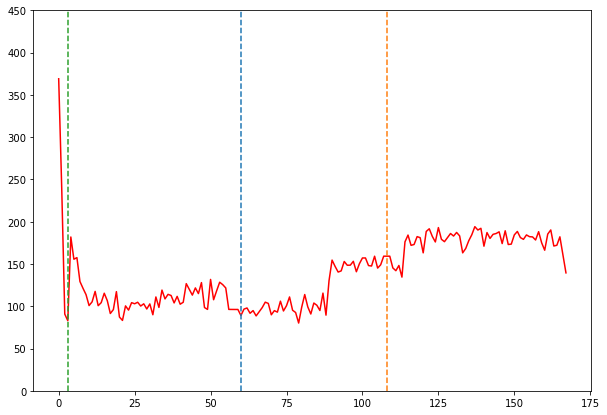

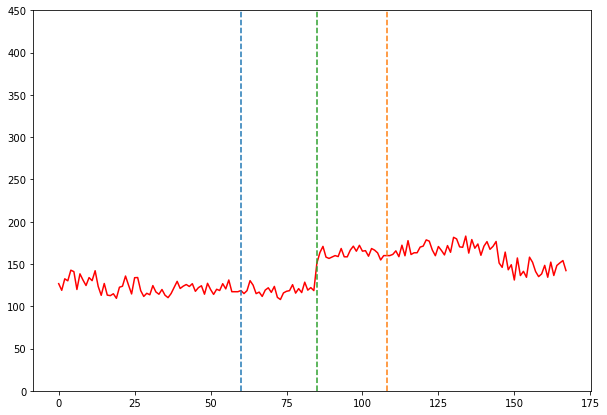

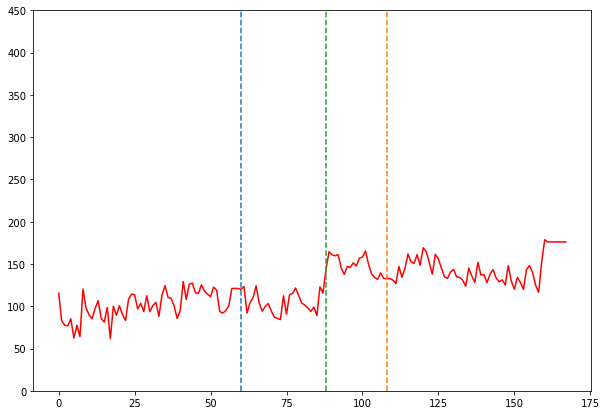

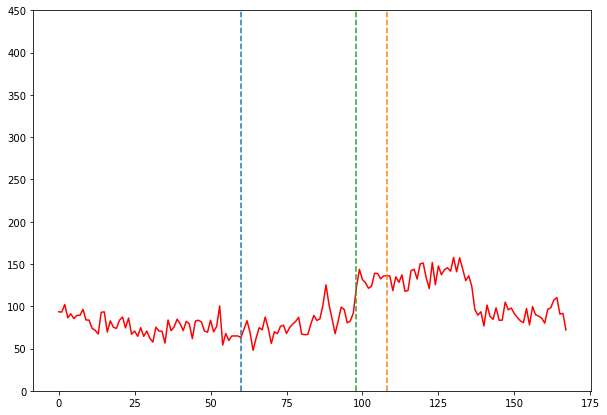

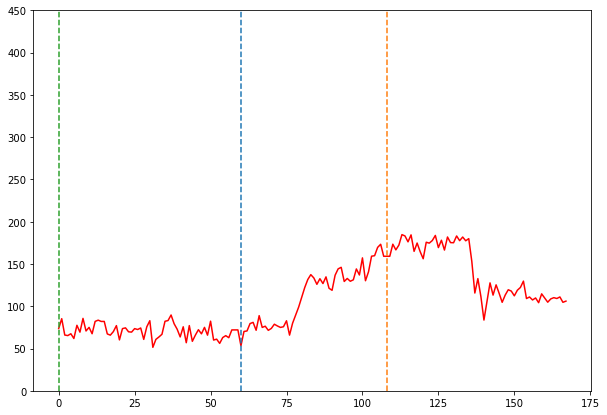

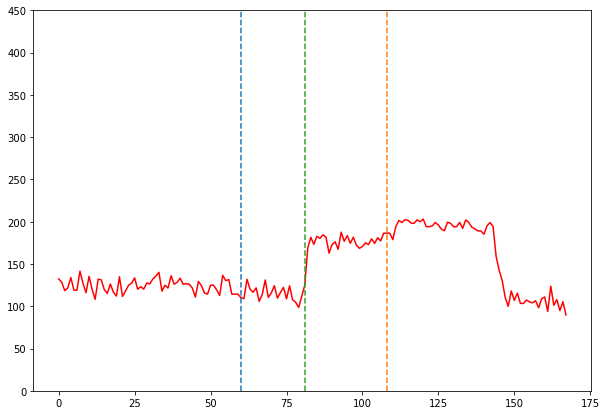

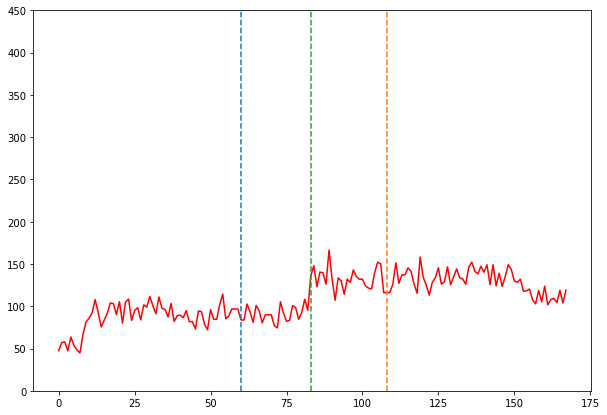

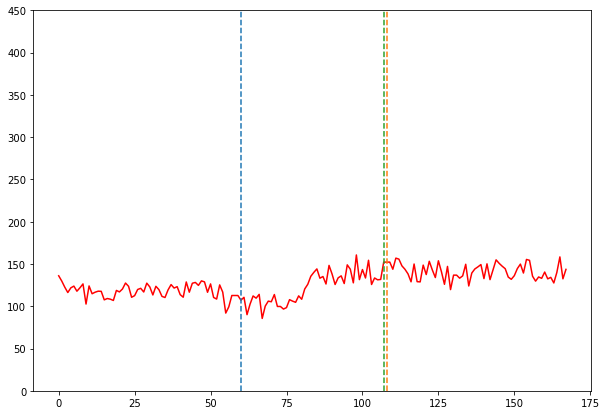

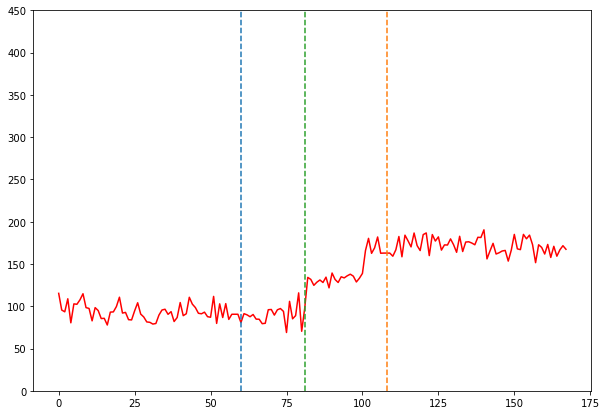

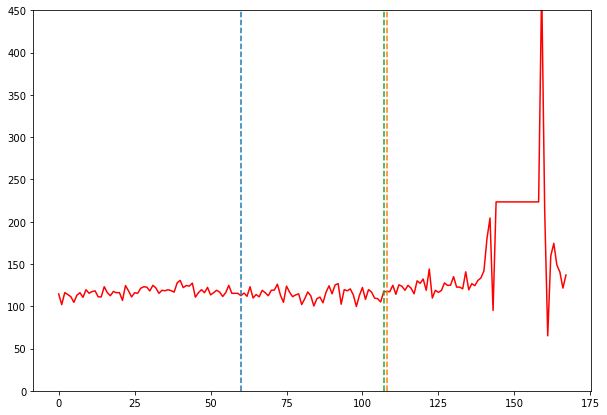

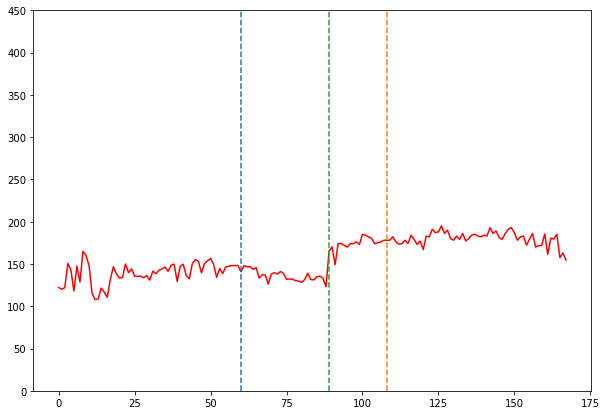

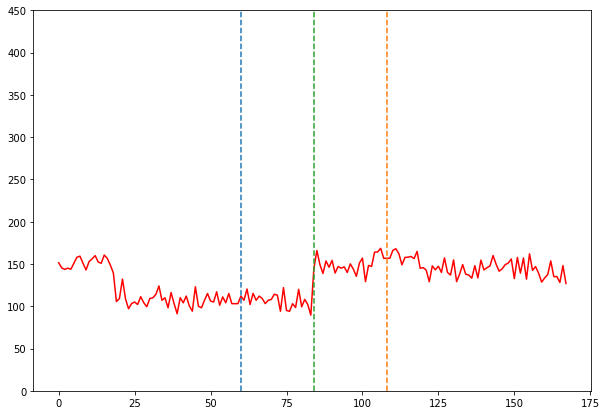

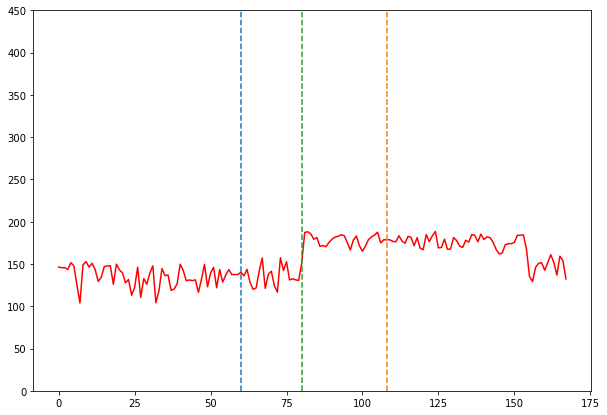

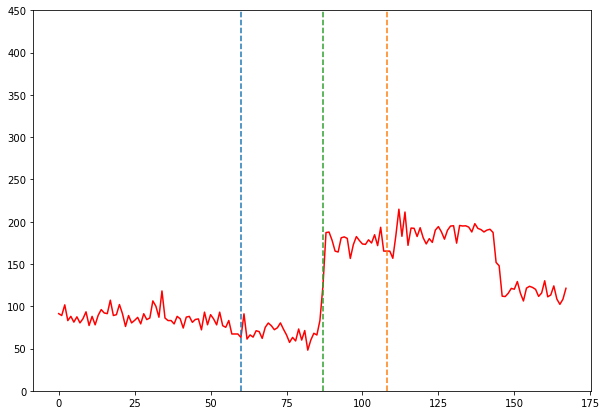

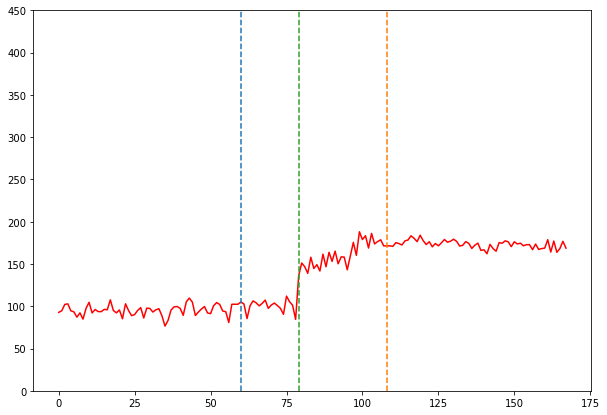

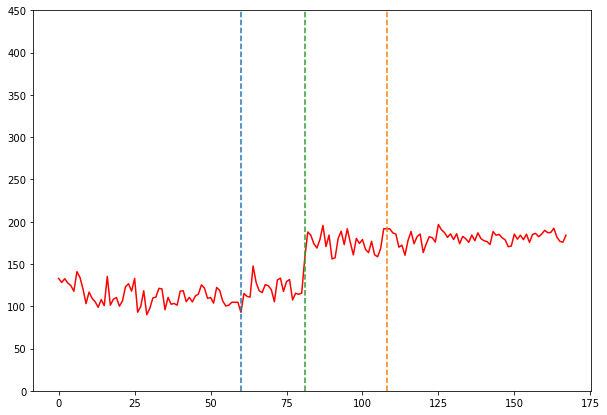

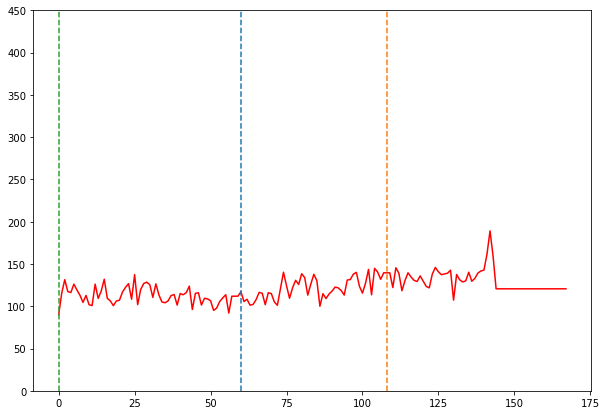

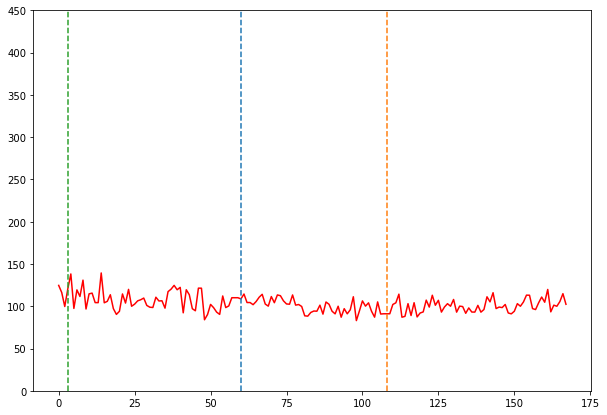

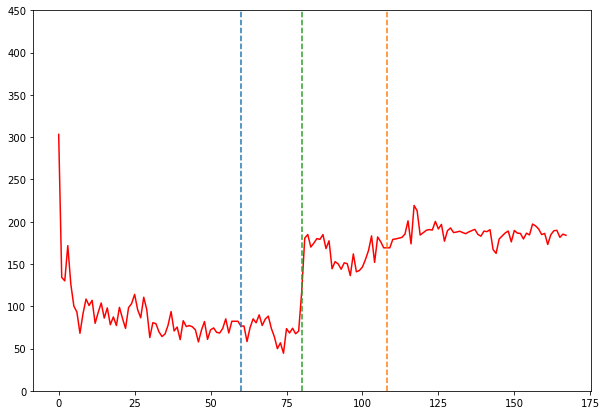

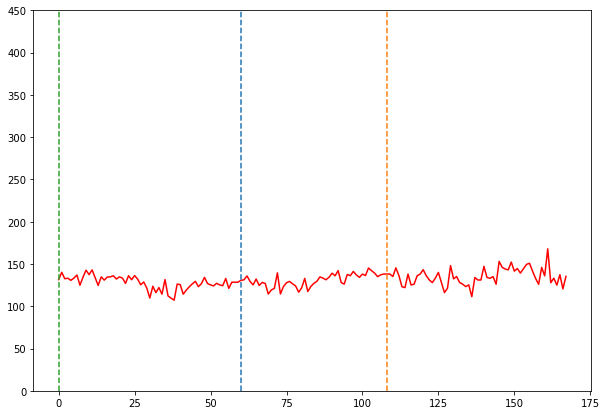

In [18]:
grad_max = np.array([np.argmax(np.gradient(data[32, target_idx, 0:108][i], edge_order=2)) for i in range(40)])
for i in range(40):
    plt.figure(figsize=(10,7))
    plt.plot(data[32, target_idx, :][i], c='r')
    plt.plot([(0.5)*120, (0.5)*120], [0, 450], '--')
    plt.plot([(0.5+0.4)*120, (0.5+0.4)*120], [0, 450], '--')
    plt.plot([grad_max[i], grad_max[i]], [0, 450], '--')
    plt.ylim([0,450])

In [19]:
grad_max = np.array([np.argmax(np.gradient(data[32, :, 0:108][i], edge_order=2)) for i in range(np.shape(data)[1])])

In [20]:
np.median(grad_max[np.argwhere(non_target_idx).ravel()]) / 120 - 0.5

0.050000000000000044

In [21]:
np.median(grad_max[np.argwhere(target_idx).ravel()]) / 120 - 0.5

0.17500000000000004

In [152]:
target_idx_clean[target_idx].shape

(40,)

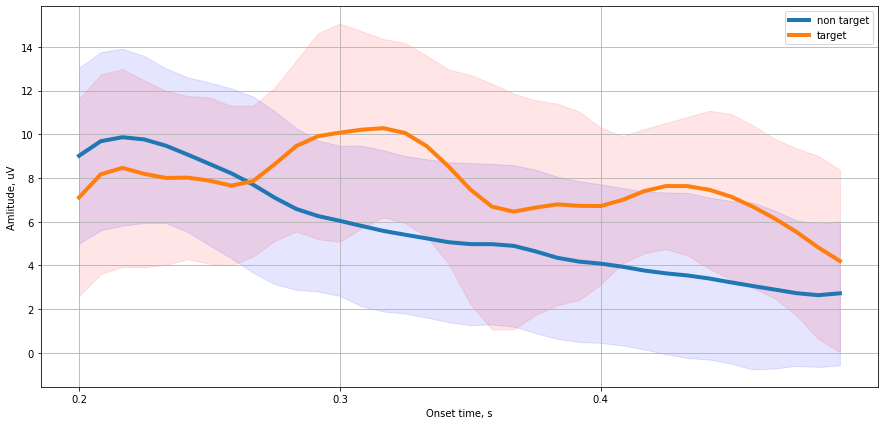

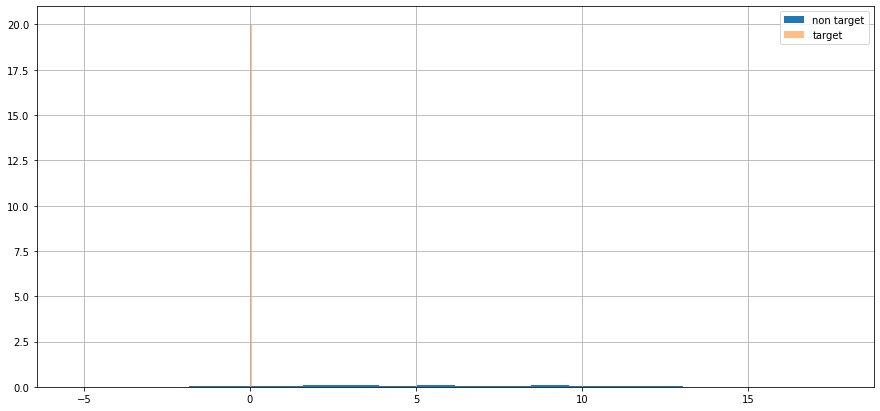

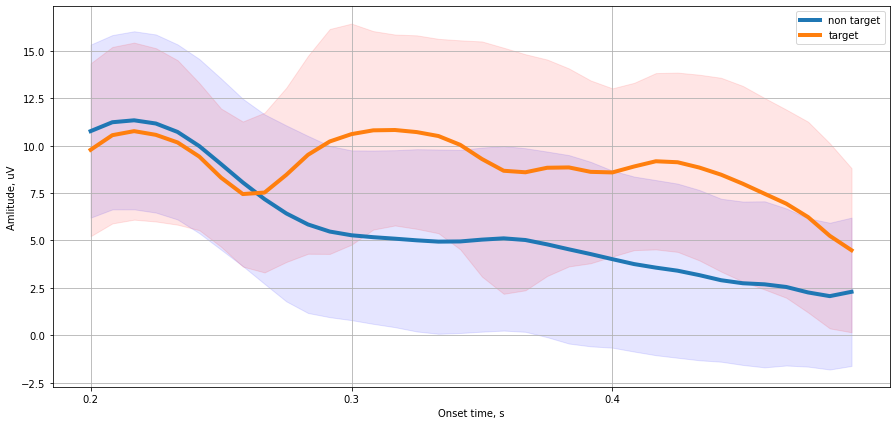

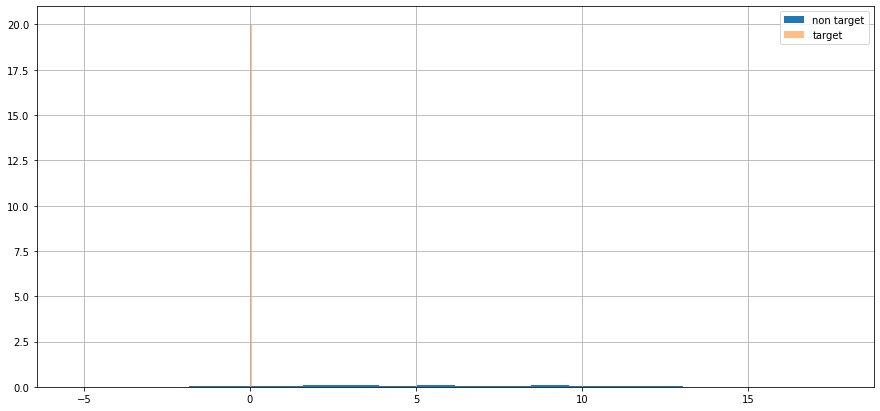

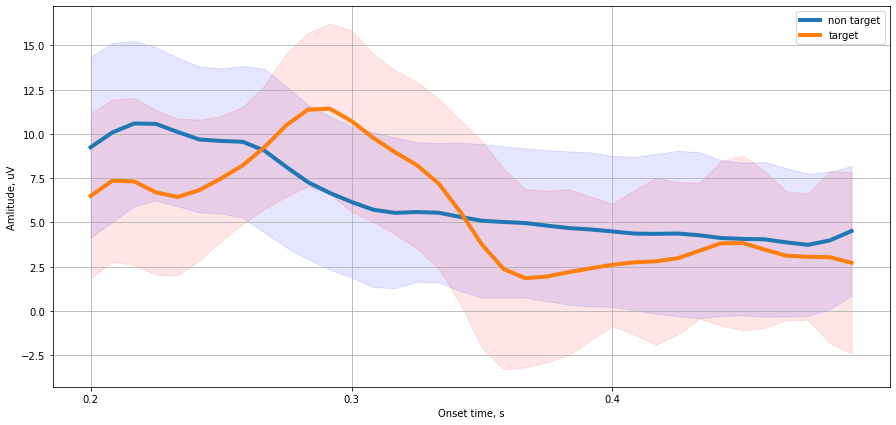

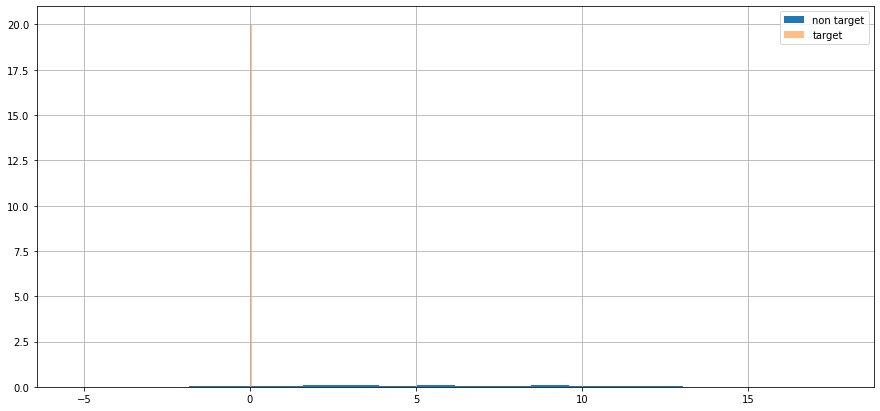

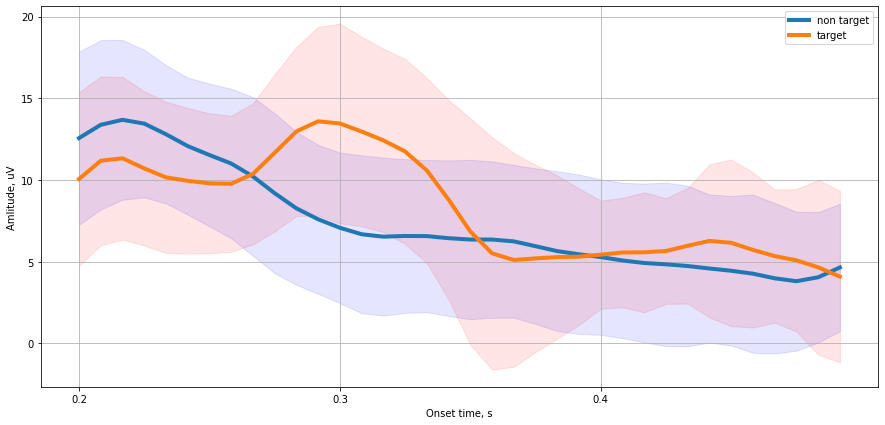

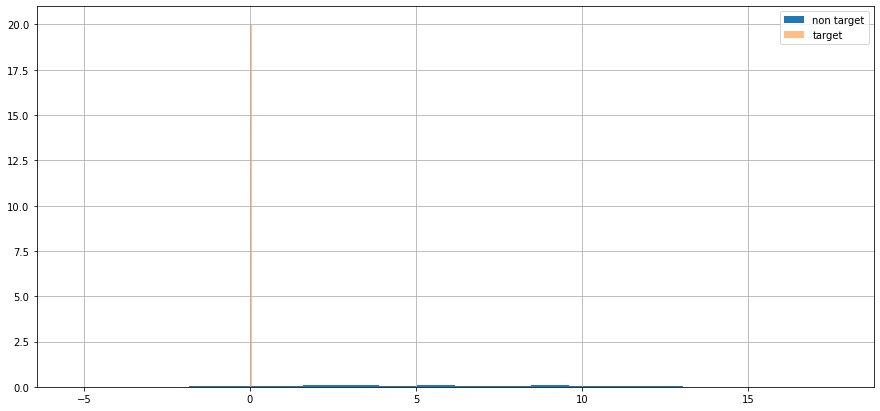

In [158]:
# grad_min = np.array([np.argmin(np.gradient(data[32, :, :][i], edge_order=2)) for i in range(np.shape(data)[1])])
grad_max = np.array([np.argmax(np.gradient(data[32, :, 60:108][i], edge_order=2)) for i in range(np.shape(data)[1])])
# grad_max = np.array([0 for i in range(np.shape(data)[1])])
grad_max+=60

non_target_idx = data[35, :, 1] == 1
target_idx = data[35, :, 1] == 2

target_idx_clean = np.array(target_idx)
target_idx_clean[target_idx] = target_idx_clean[target_idx] * (grad_max[target_idx] > 80) * (grad_max[target_idx] < 108)
start, end = int((0.2 + 0.5) * 120), int((0.5 + 0.5) * 120)
# start, end = int((-0.5 + 0.5) * 120), int((0.9 + 0.5) * 120)
ts_idx = slice(start, end)

chs = [23,24,27, 28]
# chs = np.arange(0, 32)

for ch_idx in chs:
    
    plt.figure(figsize=(15,7))
    
    # plot mean and confidence interval for non-target data
    nt_data = data[ch_idx, non_target_idx, ts_idx]
#     nt_data = np.mean(data[chs, non_target_idx, :], axis=0)
#     nt_data = data[ch_idx, non_target_idx, :]
    plt.plot(np.mean(nt_data, axis=0), label='non target', linewidth=4)
    ci_non_target = np.std(nt_data, axis=0)
    plt.fill_between(np.arange(np.shape(nt_data)[1]), (np.mean(nt_data, axis=0) - ci_non_target), (np.mean(nt_data, axis=0)+ci_non_target), color='b', alpha=.1)

    # plot mean and confidence interval for target data
    t_data = data[ch_idx, target_idx_clean, ts_idx]
        
#     t_data = np.mean(data[chs, target_idx, :], axis=0)
#     t_data = data[ch_idx, target_idx, :]
    plt.plot(np.mean(t_data, axis=0), label='target', linewidth=4)
    ci_target = np.std(t_data, axis=0)
    plt.fill_between(np.arange(np.shape(nt_data)[1]), (np.mean(t_data, axis=0) - ci_target), (np.mean(t_data, axis=0)+ci_target), color='r', alpha=.1)
    
    # plot mean and confidence interval for cleaned target data
#     t_data_clean = data[ch_idx, target_idx_clean, ts_idx]
#     t_data_clean = data[ch_idx, target_idx_clean, :]
#     plt.plot(np.mean(t_data_clean, axis=0), label='target clean', linewidth=4)
#     ci_target_clean = np.std(t_data_clean)
#     plt.fill_between(np.arange(np.shape(nt_data)[1]), (np.mean(t_data_clean, axis=0) - ci_target_clean), (np.mean(t_data_clean, axis=0)+ci_target_clean), color='r', alpha=.1)
    
#     # find EEG values 150ms after the target was found by eyes
#     n_trials = np.shape(t_data)[0]
#     n_tp = np.shape(t_data)[1]
#     EEG_peak_target = np.zeros((n_trials, 1))
#     for i, trial_idx in enumerate(np.argwhere(target_idx).ravel()):
#         ET_idx = grad_max
#         delay_ts = int(50/1000*120)
#         window_ts = 5
#         EEG_peak_target[i] = np.mean(data[ch_idx, trial_idx, ET_idx+delay_ts-window_ts:ET_idx+delay_ts+window_ts])
        
#     n_trials = np.shape(nt_data)[0]
#     n_tp = np.shape(nt_data)[1]
#     EEG_peak_non_target = np.zeros((n_trials, 1))
#     for i, trial_idx in enumerate(np.argwhere(non_target_idx).ravel()):
#         ET_idx = grad_max
#         delay_ts = int(50/1000*120)
#         window_ts = 5
#         EEG_peak_non_target[i] = np.mean(data[ch_idx, trial_idx, ET_idx+delay_ts-window_ts:ET_idx+delay_ts+window_ts])
    
#     n_trials = np.shape(t_data)[0]
#     n_tp = np.shape(t_data)[1]
#     EEG_peak_target_min = np.zeros((n_trials, 1))
#     for i, trial_idx in enumerate(np.argwhere(target_idx).ravel()):
#         ET_idx = grad_min[trial_idx]
#         delay_ts = int(150/1000*120)
#         window_ts = 3
#         EEG_peak_target_min[i] = np.mean(data[ch_idx, trial_idx, ET_idx+delay_ts-window_ts:ET_idx+delay_ts+window_ts])
             
    
    plt.xticks(np.arange(0, np.shape(nt_data)[1], 12), np.round(1/120 * np.arange(start, end, 12) - 0.5, 2))
    plt.legend()
    plt.xlabel('Onset time, s')
    plt.ylabel('Amlitude, uV')
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.hist(EEG_peak_non_target, density=True, bins=20, label = 'non target')
    plt.hist(EEG_peak_target, density=True, bins=20, alpha=0.5, label = 'target')
#     plt.hist(EEG_peak_target_min, density=True, bins=20, alpha=0.5, label = 'target min')
    plt.legend()
    plt.grid()
    plt.show()


In [23]:
grad_max.mean() 

85.06

In [24]:
data[24, non_target_idx, :].shape

(160, 168)

In [25]:
# chs = [23,24,27, 28]
chs = np.arange(23, 32)

In [26]:
X = data[chs[0], :, 0:108]
for ch_idx in range(len(chs)):
    X = np.append(X, data[chs[ch_idx], :, 0:108], axis=1)

In [27]:
y = data[35, :, 0]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2.])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.8636363636363636

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
clf = LinearDiscriminantAnalysis()

In [38]:
scores = cross_val_score(clf, X, y, cv=5)

In [39]:
scores

array([0.95 , 0.825, 0.825, 0.875, 0.825])

In [40]:
print('CV: {:.2f} +- {:.2f}'.format(np.mean(scores), np.std(scores)))

CV: 0.86 +- 0.05
